<a href="https://colab.research.google.com/github/tubagokhan/DeepLearningNLPFoundations/blob/main/PyTorch_BERT_FineTune_IMDB_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification - IMDB Dataset

In [53]:
!pip install transformers[sentencepiece] datasets
!pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Datasets library

In [54]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookco

In [55]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [56]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [57]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [58]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [59]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [60]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [61]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [62]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [63]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [64]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [65]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [67]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"This movie is an insult to ALL submariners. It was stupid. It appeared to have been written by monkeys. The acting was absurd. If this is the view most people have of the Navy, then I weep for our defense. This movie was awful. I put it below ""Vo...",0
1284,"People criticise Disney's animated features of the 1950s for being overly glossy, set in landscapes that are much too pristine. That criticism is just. And yet it can't be the whole story, because the two least glossy - ""Alice in Wonderland"" and ...",1
408,"I had to give this film a 10 simply because it did what so many films thrown at black audiences have FAILED MISERABLY to do. This film was void of all the video whore clichés, and it also skipped the gangsters, rappers, and foul language. It exam...",1
1282,"Black Candles is rather a muddled mess from the same director that brought us ""Vampyres"" and much later, ""Rest in Pieces"", among others..I'm only noting the ones I've seen. At any rate, we have a couple making love and then somewhere near by a pi...",0
1447,"...but this just isn't working and I am surprised to see how many people consider it good. On what grounds? There are some loose hints here and there, but the whole material is self-indulgent and unconvincing. Lynch's movies are generally intrigu...",0
1144,"The really sad thing is that this was supposedly the highest budget ""Halestorm Entertainment"" has had to work with. All involved should be fined for littering since all the celluloid they wasted is good for nothing more than filling the trash. No...",0
1381,"A very well made film set in early '60s communist Yugoslavia. The five young actors who are the teenagers at the center of the story give strong, sincere and emotionally deep performances. A clear depiction of how the natural trust and naivete in...",1
181,"While a bit preachy on the topic of progress as the saving grace of mankind, this is still a stunning film that presages the science-fiction special effects blockbusters that would take another 40 years to arrive on the silver screen. It predicts...",1
1183,"Neil Simon's THE ODD COUPLE set up a model for many of his later plays. Felix Unger and Oscar Madison were the unsuitably paired roommates in the original, the former being picky and neat, the latter being slovenly and loose. Simon would rewrite ...",1
1103,"I have read the short story by Norman Maclean, and the movie did justice to Norman Maclean's writing. My husband tends to reread it occasionally, and I myself have read it over and scenes of the movie keeps coming to mind. We have videos of many ...",1


In [68]:
df.loc[0, 'text']

'A terrorist attempts to steal a top secret biological weapon, and in the process of trying to escape, he is infected when the case containing the deadly agent is compromised. Soldiers are able to retrieve the case, but the terrorist makes his way to a hotel where he attempts to hide out. They eventually make it to where he\'s hiding, and "cleanse" the hotel and its occupants. Unfortunately they dispose of his body by cremation, and if you\'ve seen Return of the Living Dead, you know what happens next.<br /><br />Zombi 3 has been widely panned by critics and zombie fans alike, as a complete mess of a movie. While that\'s a fair assessment, it\'s not without it\'s high points. For one thing, it has plenty of bloody deaths to keep gore-hounds happy. There\'s an abundance of zombies that seem to come out from everywhere possible. They\'re in the water, the rafters of houses, hiding in trees, and for some reason, they like to hide under a bunch of dead brush, only to spring out to attack a

In [69]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'A terrorist attempts to steal a top secret biological weapon, and in the process of trying to escape, he is infected when the case containing the deadly agent is compromised. Soldiers are able to retrieve the case, but the terrorist makes his way to a hotel where he attempts to hide out. They eventually make it to where he\'s hiding, and "cleanse" the hotel and its occupants. Unfortunately they dispose of his body by cremation, and if you\'ve seen Return of the Living Dead, you know what happens next.Zombi 3 has been widely panned by critics and zombie fans alike, as a complete mess of a movie. While that\'s a fair assessment, it\'s not without it\'s high points. For one thing, it has plenty of bloody deaths to keep gore-hounds happy. There\'s an abundance of zombies that seem to come out from everywhere possible. They\'re in the water, the rafters of houses, hiding in trees, and for some reason, they like to hide under a bunch of dead brush, only to spring out to attack as the heroes

In [70]:
df.label.value_counts()

0    815
1    785
Name: label, dtype: int64

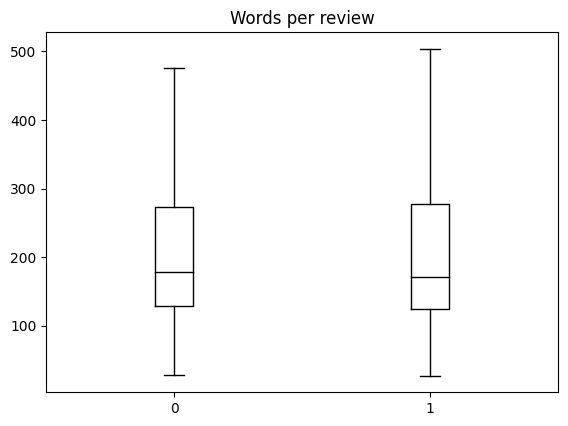

In [71]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [72]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
572,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
764,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
839,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
1383,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
1418,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
1496,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34


In [73]:
imdb.reset_format()

## Tokenizer

In [74]:
from transformers import AutoTokenizer

#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [75]:
print(imdb_encoded['train'][0])

{'text': 'A terrorist attempts to steal a top secret biological weapon, and in the process of trying to escape, he is infected when the case containing the deadly agent is compromised. Soldiers are able to retrieve the case, but the terrorist makes his way to a hotel where he attempts to hide out. They eventually make it to where he\'s hiding, and "cleanse" the hotel and its occupants. Unfortunately they dispose of his body by cremation, and if you\'ve seen Return of the Living Dead, you know what happens next.<br /><br />Zombi 3 has been widely panned by critics and zombie fans alike, as a complete mess of a movie. While that\'s a fair assessment, it\'s not without it\'s high points. For one thing, it has plenty of bloody deaths to keep gore-hounds happy. There\'s an abundance of zombies that seem to come out from everywhere possible. They\'re in the water, the rafters of houses, hiding in trees, and for some reason, they like to hide under a bunch of dead brush, only to spring out to

## Tiny IMDB

In [76]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotImageClassification',
 'Auto

In [77]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

In [78]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [79]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_toke

In [80]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.697100,0.694700
2,0.657500,0.693344


In [81]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.41384098, -0.33897725],
       [-0.4066172 , -0.15366302],
       [-0.3608241 , -0.40203384],
       [-0.38675714, -0.37585154],
       [-0.4161703 , -0.3378494 ],
       [-0.3421607 , -0.3253234 ],
       [-0.35320002, -0.33405244],
       [-0.35735655, -0.3682422 ],
       [-0.39233404, -0.35897025],
       [-0.37178415, -0.3869053 ]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7147935628890991, 'test_runtime': 0.0858, 'test_samples_per_second': 116.553, 'test_steps_per_second': 11.655})

In [82]:
preds.predictions.shape

(10, 2)

In [83]:
preds.predictions.argmax(axis=-1)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [84]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.4

In [86]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [87]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.630000,0.661370,0.600000
2,0.578300,0.674024,0.600000


## Training run

In [88]:
batch_size = 8
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [89]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.461700,0.415688,0.847500
2,0.209300,0.496716,0.880000


In [90]:


trainer.evaluate()

{'eval_loss': 0.49671608209609985,
 'eval_accuracy': 0.88,
 'eval_runtime': 3.4652,
 'eval_samples_per_second': 115.432,
 'eval_steps_per_second': 14.429,
 'epoch': 2.0}

In [91]:
trainer.save_model()

In [92]:
model_name

'bert-base-cased-finetuned-imdb'

In [93]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.893162190914154}]

In [94]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.9091742634773254}]